# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, Ridge
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
X.shape, y.shape

((442, 10), (442,))

# Train Test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

# Scatter Plot X vs y

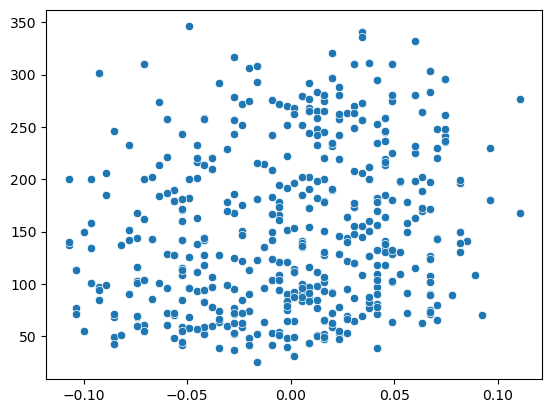

In [6]:
sns.scatterplot(x=X[:, 0], y=y);

# Ridge Regression using sklearn's SGDRegressor

In [7]:
sgd = SGDRegressor(penalty='l2', max_iter=500, eta0=0.01, learning_rate='constant', alpha=0.001)
# learning rate - 0.1 (eeta in partial derivative equation)
# alpha (lambda/penalty term) - 0.001 

## Fit the model

In [8]:
sgd.fit(X_train, y_train)

SGDRegressor(alpha=0.001, learning_rate='constant', max_iter=500)

## Prediction on test data

In [9]:
y_pred_sgd = sgd.predict(X_test)

## R2 Score

In [10]:
print('R2 score using SGD Regressor: ', r2_score(y_test, y_pred_sgd))

R2 score using SGD Regressor:  0.4269879268182556


## Coefficients and Intercept

In [11]:
print(f'Coefficent: {sgd.coef_}, \nIntercept: {sgd.intercept_}')

Coefficent: [  55.11668146  -65.78644956  303.94747458  212.96686094   12.74102361
  -17.59364401 -158.27897258  136.39075876  245.15287736  136.02625629], 
Intercept: [156.33024722]


# Ridge Regression using sklearn's Ridge and solver

In [12]:
ridge = Ridge(alpha=0.001, max_iter=500, solver='sparse_cg')

## Fit the model

In [13]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.001, max_iter=500, solver='sparse_cg')

## Prediction on test data

In [14]:
y_pred_ridge = ridge.predict(X_test)

## R2 Score

In [15]:
print('R2 score using Ridge: ', r2_score(y_test, y_pred_ridge))

R2 score using Ridge:  0.4534280305933893


## Coefficients and Intercept

In [16]:
print(f'Coefficent: {ridge.coef_}, \nIntercept: {ridge.intercept_}')

Coefficent: [  38.48350222 -241.35179746  543.83517435  346.78282693 -827.70199985
  437.17374349  116.9497567   260.75925802  696.12921785   49.74344197], 
Intercept: 151.3419806004085


# Ridge Regression from scratch using Gradient Descent

In [17]:
class RidgeGD:

    def __init__(self, learning_rate, alpha, epochs):
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X_train, y_train):

        self.coef_ = np.ones(X_train.shape[1]) # This will a 1D array having all ones in it - [1. 1. 1. ....]
        self.intercept_ = 0 
        
        # Insert 0 at 0th position in self.coef_ -> [0. 1. 1. ......]
        betas = np.insert(self.coef_, 0, self.intercept_)  

        # Add 1 before X_train (insert 1's at 0th index in X_train)
        X_train = np.insert(X_train, 0, 1, axis=1)

        for i in range(self.epochs):

            # Derivative of loss function w.r.t betas
            betas_der = np.dot(X_train.T, X_train).dot(betas) - np.dot(X_train.T, y_train) + (self.alpha * betas)

            # Update the betas 
            betas = betas - self.learning_rate * betas_der

        self.coef_ = betas[1: ]
        self.intercept_ = betas[0]

        print('Coefficient: ', self.coef_)
        print('Intercept: ', self.intercept_)

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [18]:
myRidge = RidgeGD(learning_rate=0.005, alpha=0.001, epochs=500)

## Fit the model

In [19]:
myRidge.fit(X_train, y_train)

Coefficient:  [  43.37183861 -192.03766574  496.43542567  319.37407     -64.42788084
 -113.194338   -213.9073644   144.86136322  367.67948022  119.56857869]
Intercept:  151.40454755919714


## Prediction on test data

In [20]:
y_pred_myRidge = myRidge.predict(X_test)

## R2 Score

In [21]:
print('R2 score using RidgeGD: ', r2_score(y_test, y_pred_myRidge))

R2 score using RidgeGD:  0.4592249376936406


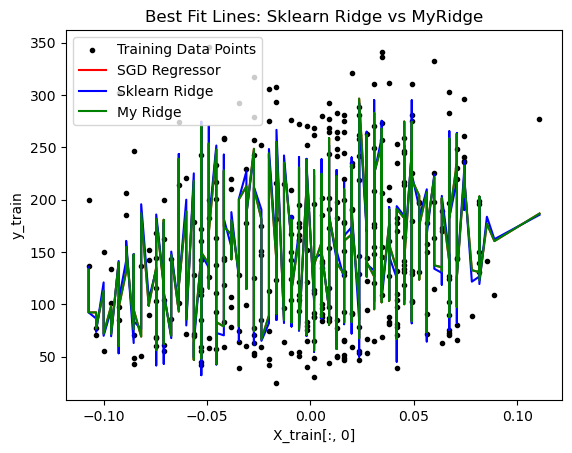

In [22]:
# Sort X_train by the chosen feature for plotting
sort_idx = X_train[:, 0].argsort()
X_sorted = X_train[sort_idx]
y_sorted = y_train[sort_idx]

# Predictions (using sorted X)
y_pred_sgd = sgd.predict(X_sorted)
y_pred_sklearn = ridge.predict(X_sorted)
y_pred_myridge = myRidge.predict(X_sorted)

plt.scatter(X_train[:, 0], y_train, c='black', marker='.', label='Training Data Points')
plt.plot(X_sorted[:, 0], y_pred_myridge, color='red', linestyle='-', label='SGD Regressor')
plt.plot(X_sorted[:, 0], y_pred_sklearn, color='blue', linestyle='-', label='Sklearn Ridge')
plt.plot(X_sorted[:, 0], y_pred_myridge, color='green', linestyle='-', label='My Ridge')
plt.xlabel('X_train[:, 0]')
plt.ylabel('y_train')
plt.title('Best Fit Lines: Sklearn Ridge vs MyRidge')
plt.legend()
plt.show()